In [ ]:
#<start>only for colab users

In [156]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [3]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/daraee.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/daraee_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/zaree.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/zaree_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/tahmasbi.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/tahmasbi_prob.jpg -P images

--2023-05-27 08:24:12--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132827 (130K) [image/jpeg]
Saving to: ‘images/moh.jpg’

moh.jpg             100%[===================>] 129.71K  --.-KB/s    in 0.01s   

2023-05-27 08:24:13 (11.2 MB/s) - ‘images/moh.jpg’ saved [132827/132827]

--2023-05-27 08:24:13--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh_prob.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27504 (2

In [158]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_vggface
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-i81l2k57
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-i81l2k57
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#<end>only for colab users

In [159]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
%matplotlib inline
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

In [ ]:
# default : VGG16 , you can use model='resnet50' or 'senet50'

In [162]:
# Convolution Features
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max

In [161]:
model=vgg_features

### New Section

In [163]:
model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [164]:
face_detector = MTCNN()

In [165]:
def detect_face(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #mtcnn expects RGB but OpenCV read BGR
    detections = face_detector.detect_faces(img_rgb)
    detection = detections[0]
    x, y, w, h = detection["box"]
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    return detected_face

###نمایش تصویر دیتکت شده

1/1 [==============================] - 0s 30ms/step


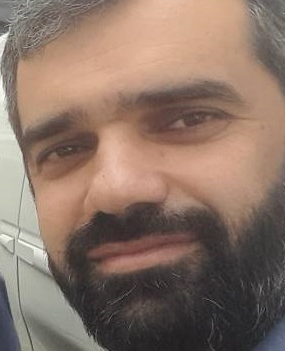

In [187]:
from google.colab.patches import cv2_imshow
img=cv2.imread("./images/zaree.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #mtcnn expects RGB but OpenCV read BGR
detections = face_detector.detect_faces(img_rgb)
detection = detections[0]
x, y, w, h = detection["box"]
detected_face = img[int(y):int(y+h), int(x):int(x+w)]
#plt.imshow(img_rgb)
cv2_imshow(detected_face)

In [167]:
def preprocess_face(img, target_size=(224,224)):
    img = cv2.imread(img)
    img = detect_face(img)
    img = cv2.resize(img, target_size)
    img_pixels = image.img_to_array(img)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255 #normalize input in [0, 1]
    return img_pixels

In [168]:
def img_to_encoding(path):
    img = preprocess_face(path)
    return model.predict(img)[0]

In [184]:
database = {}

database["mohammad"] = img_to_encoding("./images/moh.jpg")
database["daryaee"] = img_to_encoding("./images/daraee.jpg")
database["zaree"] = img_to_encoding("./images/zaree.jpg")
database["tahmasbi"] = img_to_encoding("./images/tahmasbi.jpg")

1/1 [==============================] - 1s 612ms/step


In [56]:
database.keys()

dict_keys(['mohammad', 'daryaee', 'zaree', 'tahmasbi'])

In [170]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [171]:
verification_threshhold = 0.547

## Face Verification

In [172]:
def verify(image_path, identity, database):
    # Step 1: Compute the encoding for the image. Use img_to_encoding()
    encoding = img_to_encoding(image_path) 
    
    # Step 2: Compute distance with identity's image
    dist = EuclideanDistance(encoding, database[identity])
    
    # Step 3: Open the door if dist < verification_threshhold, else don't open
    if dist < verification_threshhold:
        print("It's " + str(identity) + ", welcome!")
    else:
        print("It's not " + str(identity) + ", please go away")
             
    return dist

In [173]:
verify("images/zaree_prob.jpg", "mohammad", database)

1/1 [==============================] - 2s 2s/step
It's not mohammad, please go away


0.7162242

In [174]:
verify("images/daraee_prob.jpg", "daryaee", database)

1/1 [==============================] - 1s 552ms/step
It's daryaee, welcome!


0.33279487

In [175]:
verify("images/moh_prob.jpg", "daryaee", database)

1/1 [==============================] - 1s 632ms/step
It's not daryaee, please go away


0.7221227

## Face Identification

In [177]:
def who_is_it(image_path, database):
   
    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding()
    encoding = img_to_encoding(image_path)
    
    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 
    min_dist = 1000
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        # Compute L2 distance between the target "encoding" and the current "emb" from the database. (≈ 1 line)
        dist = EuclideanDistance(encoding, db_enc)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if min_dist > dist:
            min_dist = dist
            identity = name

  
    if min_dist > verification_threshhold:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [178]:
who_is_it("images/daraee_prob.jpg", database)

1/1 [==============================] - 2s 2s/step
it's daryaee, the distance is 0.33279487


(0.33279487, 'daryaee')

<img src='https://github.com/sedavasema/one-shot-learning/blob/main/images/m.jpg?raw=1' style="width: 160px;">

In [179]:
who_is_it("images/zaree_prob.jpg", database)

1/1 [==============================] - 1s 1s/step
it's zaree, the distance is 0.43554032


(0.43554032, 'zaree')

<img src='https://github.com/sedavasema/one-shot-learning/blob/main/images/m_wrapped.jpg?raw=1' style="width: 160px;">